## Introduction

 - The problem defined here states to predict the `staff` size in the hotel with the help of all dependent variables.
 - For solving this problem we will be following the steps as mentioned in the question and for explaining the observation `yellow` boxes willl be used
 -  Each steps will be discussed and `class` function will be used and the scripts will be imported as .py. 

<div class="alert alert-block alert-danger">
<b>Library:</b> Please install missing libraries by using !pip install 'lib-name' ex. !pip install numpy
</div>

In [110]:
# import the libraries
import os
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# 1. Clone this repository
# import the git repo
!git clone https://bitbucket.org/circunomics/datasciencechallenge.git

In [4]:
# set the directory
directory = r'C:\Users\uie13814\Documents\datasciencechallenge'

In [11]:
# 2. Read the hotes_info.csv and display columns.
# read the data in proper format and read it
df = pd.read_csv(directory + '\\' +  'hotes_info.csv')
df.head()

,Hotel Name,m2,Age,Max Number of Guests,Number of Rooms,Size of the Rooms,Staff,Maintenance Cost
0,Soraiya,3511,2,192,96,29,2.9,241
1,Amante,1136,19,141,47,19,1.7,635
2,Nissim,3347,2,534,267,10,5.9,441
3,Kentaro,3341,14,294,98,27,2.8,872
4,Naw,3975,18,327,109,29,2.6,698


In [12]:
# 3. Calculate basic statistics of the data (count, mean, std, etc) and examine data and state your observations.
df.describe()

,m2,Age,Max Number of Guests,Number of Rooms,Size of the Rooms,Staff,Maintenance Cost
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,2935.887500,10.718750,315.118750,128.443750,20.193750,3.250625,540.043750
std,1275.215409,5.863405,196.701491,73.133181,6.424694,1.484892,262.580933
min,427.000000,1.000000,26.000000,13.000000,10.000000,0.900000,102.000000
25%,1863.250000,6.000000,171.000000,69.000000,14.000000,2.100000,281.000000
50%,3090.000000,11.000000,282.000000,117.000000,20.000000,3.100000,565.500000
75%,3890.500000,16.000000,408.750000,163.500000,26.000000,4.100000,760.000000
max,4995.000000,20.000000,1050.000000,350.000000,30.000000,7.500000,995.000000


In [44]:
# lets do some visualisation for better understanding the data ( we have created a viz library for this)
%run viz.py

In [46]:
# let us see the data first
description(df).data_description(summary = True)

The number of points in this data is 160 

The shape of the data is (160, 8) 

Let's see the data : 

The summary of data set is : 
                m2         Age  Max Number of Guests  Number of Rooms  \
count   160.000000  160.000000            160.000000       160.000000   
mean   2935.887500   10.718750            315.118750       128.443750   
std    1275.215409    5.863405            196.701491        73.133181   
min     427.000000    1.000000             26.000000        13.000000   
25%    1863.250000    6.000000            171.000000        69.000000   
50%    3090.000000   11.000000            282.000000       117.000000   
75%    3890.500000   16.000000            408.750000       163.500000   
max    4995.000000   20.000000           1050.000000       350.000000   

       Size of the Rooms       Staff  Maintenance Cost  
count         160.000000  160.000000        160.000000  
mean           20.193750    3.250625        540.043750  
std             6.424694    1.484892   

In [53]:
# count of hotels
description(df).value_counts('Hotel Name')

The unique values in each category of Hotel Name is : 
Macoy       1
Tayte       1
Kiaria      1
Riddhima    1
Menaal      1
           ..
Betel       1
Lennox      1
Daimion     1
Ra          1
Kayvion     1
Name: Hotel Name, Length: 160, dtype: int64


In [54]:
# let us visualise some features
d = visualisation(df)

In [71]:
d.line_plot('Max Number of Guests','m2')

In [58]:
# let's see some features
d.box_plot('Age')
d.box_plot('Max Number of Guests')

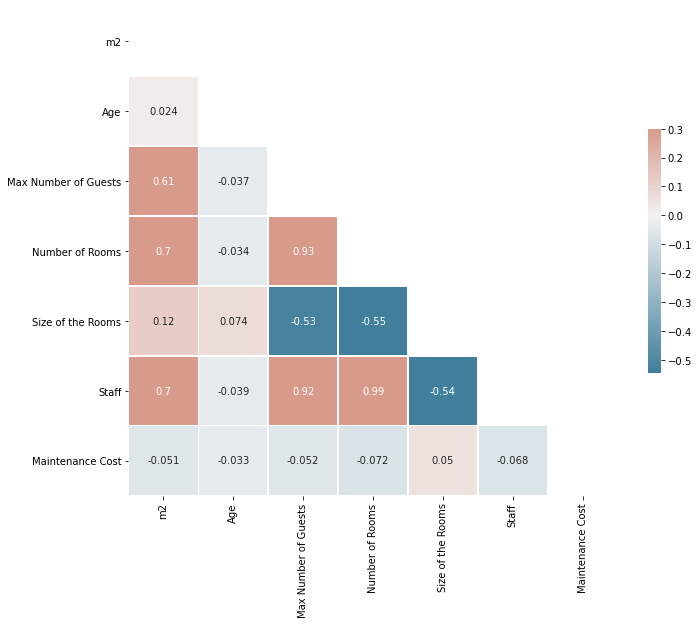

In [70]:
d.heat_map()

4. Select columns that will probably be important to predict “staff” size.
5. If you removed columns, explain why you removed those


*Observations*

<div class="alert alert-block alert-warning">
    
- The summary statistics shows us that we have very less data points i.e 160 data points is very less for building a model.
    
    
- The hotel name is unique it counts to only one so we **drop** this column.
    
    
- The size of hotel shows **upward** trend with increasing number of guest but not completely linear.
    
 
- There are some outliers in 'Max Number of Guests' so we will treat them for **outliers**.
   
    
- There is a high coorelation between 'Number of Rooms' and 'Max Number of Guests' so we drop either one of them to avoid **multicollinearity**.
    

- The column of 'Age' has very less coorelation with 'Staff' but still we will keep it intially. 
    
    
</div>


## Model Building

In [129]:
# 6. Use one-hot encoding for categorical features.
# Not Required as we are dropping column of 'Hotel' and 'Max Number of Guests'

In [177]:
# let us prepare the dataset
X   = df.drop(columns = ['Hotel Name','Max Number of Guests','Staff'])
y   = df['Staff'].values
cols= X.columns.tolist()

In [178]:
# normalising the data with min max scaler
scaler = MinMaxScaler(feature_range=(0, 1))
X      = scaler.fit_transform(X)
y      = scaler.fit_transform(y.reshape(-1, 1))

In [188]:
# We have created script for modelling and we are importing it as regression.py
%run regression.py

In [189]:
# 7.Create training and testing sets (use 60% of the data for the training and reminder for testing).
reg = regression(X, y,cols,split_ratio=0.4)

The len of train data is 96
The len of test data is 64


In [185]:
# 8. Build a machine learning model to predict the ‘staff’ size.
linear_reg = reg.linear_regression()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.997
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              6006.
Date:                Fri, 07 May 2021   Prob (F-statistic):                   5.35e-113
Time:                        13:02:47   Log-Likelihood:                          219.01
No. Observations:                  96   AIC:                                     -428.0
Df Residuals:                      91   BIC:                                     -415.2
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [186]:
rf = reg.random_forest(feature_importance=True)

Performing modelling for Random forest

Best parameters = {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 10, 'n_estimators': 20}

The metrics of regression are :
Mean Absolute Error: 0.030060369318181835
Mean Squared Error: 0.0015084130724455592
Root Mean Squared Error: 0.038838293892054
R Squared: 0.9652229901131508

The feature importance are :
            variable  importance
2    Number of Rooms    0.999058
1                Age    0.000568
4   Maintenance Cost    0.000374
0                 m2    0.000000
3  Size of the Rooms    0.000000


The results of your model are:


,Model,MAE,MSE,RMSE,R_Squared
0,Linear Regression,0.021367,0.000623,0.024955,0.985558
1,Random Forest,0.026611,0.001474,0.038399,0.965804
2,Random Forest,0.027199,0.001511,0.038868,0.964965


None
The residual and error plots


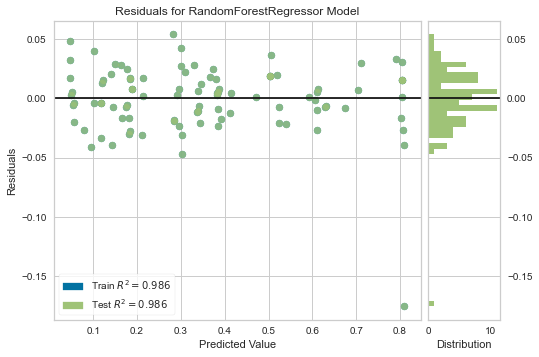

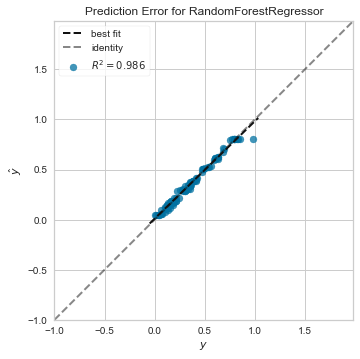

In [136]:
reg.result_plots(rf,error_plots = True)

In [138]:
xg = reg.XG_Boost(feature_importance=True)

Performing modelling for XG Boost Regressor

Best parameters = {'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 500, 'objective': 'reg:squarederror', 'subsample': 0.7}

The metrics of regression are :
Mean Absolute Error: 0.026105320696704883
Mean Squared Error: 0.0012321115464250217
Root Mean Squared Error: 0.03510144650046521
R Squared: 0.9714255526300396

The feature importance are :
            variable  importance
2    Number of Rooms    0.397984
0                 m2    0.300405
3  Size of the Rooms    0.244138
4   Maintenance Cost    0.031608
1                Age    0.025865


## Analysis

*Observations*

<div class="alert alert-block alert-warning">
    
- Simple **linear regression** performed here shows R-squared value upon fit.
    
    
- To extensively find the best possible fit we do a grid search CV with tree based models and see the hyperparams tune to a good accuracy.
    
 
-  By  feature importance we observe that, variables like **Number of rooms** and **m2** play a important role in predicting staff which kinda makes sense in practical world.
    
   
- The best fit line of train set is highly coorelated with test line which shows it is homogenously distributed data.
    
    
</div>

In [142]:
# 9.Calculate the Pearson correlation coefficient for the training set and testing datasets.

- Although we have calculated coorelation for feature selection before. We calculate pearson coorelation here for train and test set sperately of all dependent variables
- Pearson coorelation, for data 'X' and 'Y' is given by the formula,

$$ \text{Pearson's correlation coefficient} = \frac{covariance(X, Y)}{(stdv(X) * stdv(Y))}$$

In [163]:
def pearson(x,y):
    '''
    For finding person coorelation
    '''
    scorex = []
    scorey = []

    for i in x: 
        scorex.append((i - np.mean(x))/np.std(x)) 

    for j in y:
        scorey.append((j - np.mean(y))/np.std(y))
        
    # multiplies both lists together into 1 list  and sums the whole list   
    return (sum([i*j for i,j in zip(scorex,scorey)]))/(len(x)-1)


In [166]:
## pearson ccorelation of train set
pearson(reg.X_train, reg.y_train)

array([ 0.70365654, -0.0467621 ,  0.76276019, -0.63711356, -0.10437563])

In [167]:
## pearson ccorelation of test set
pearson(reg.X_test, reg.y_test)

array([ 6.17819129e-01, -2.35546499e-02,  7.01304667e-01, -5.27733962e-01,
        6.52479520e-04])

 10.Describe hyper-parameters in your model and how you would change them to improve the performance of the model.
 
- Since, a tree based regression is used the hyperparams used here is based on the tree which gives us best accuracy

- A `greedy` Grid Search CV is used for selecting the hyperparams which is discuess in this [documentation](https://scikit-learn.org/stable/modules/grid_search.html)

- The hyperparams used here are:
1. n_estimators = number of trees in the foreset
2. max_features = max number of features considered for splitting a node
3. max_depth = max number of levels in each decision tree
4. min_samples_split = min number of data points placed in a node before the node is split
5. min_samples_leaf = min number of data points allowed in a leaf node
6. bootstrap = method for sampling data points (with or without replacement)

11. What is regularization? What is the regularization parameter in your model?

Regularization, can be defined as tuning the approximate function to predict the value by adding a penalty term. The purpose of this is to avoid overfitting. The two types of regularization are:

- **l1 regularization** : This can be also be termed as lasso regression. It trades for increase in 'bias' but reduces the 'variance'

- **l2 regularization** : This can be also be termed as ridge regression. It imposes penalty on the squared weights to reduce the bias in the model



12. Plot regularization parameter value vs Pearson correlation for the test and training sets, and see whether your model has a bias problem or variance problem.

In [195]:
# importing for simple linear regression
from sklearn import linear_model
from sklearn import metrics

In [198]:
# let us fir for 'ridge' and 'lasso'
linear_lasso = linear_model.Lasso(alpha=.01)
linear_lasso.fit(reg.X_train, reg.y_train)

linear_ridge = linear_model.Ridge(alpha=.01)
linear_ridge.fit(reg.X_train, reg.y_train)

Ridge(alpha=0.01)

In [200]:
# let us see 
pred = linear_lasso.predict(reg.X_test)
print('R2 for lasso regression {}'.format(metrics.r2_score(reg.y_test, pred)))

pred = linear_ridge.predict(reg.X_test)
print('R2 for ridge regression {}'.format(metrics.r2_score(reg.y_test, pred)))

R2 for lasso regression 0.9373783135151912
R2 for ridge regression 0.9856434838488153


In [254]:
## let us plot in lin space for ridge regression
space = [0.001 , 0.01,  0.1, 0.3 , 0.5, 0.9, 1, 2, 2.5, 3, 5]

In [255]:
# for storing the error params
metrics_lasso = []
metrics_ridge = []
for i in space:
    linear_lasso = linear_model.Lasso(alpha=i)
    linear_ridge = linear_model.Ridge(alpha=i)
    
    linear_lasso.fit(reg.X_train, reg.y_train)
    linear_ridge.fit(reg.X_train, reg.y_train)
    
    pred = linear_lasso.predict(reg.X_test)
    metrics_lasso.append(np.sqrt(metrics.mean_squared_error(reg.y_test, pred)))
    
    pred = linear_ridge.predict(reg.X_test)
    metrics_ridge.append(np.sqrt(metrics.mean_squared_error(reg.y_test, pred)))

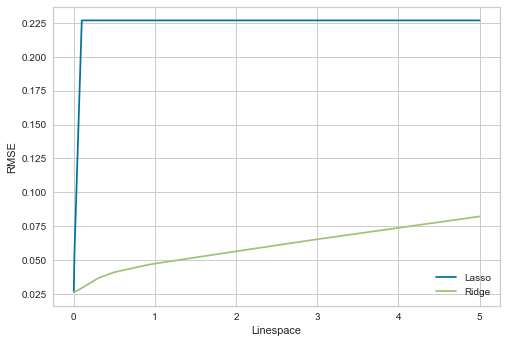

In [256]:
import matplotlib.pyplot as plt
plt.plot(space,metrics_lasso, label="Lasso")
plt.plot(space,metrics_ridge, label="Ridge")
plt.xlabel('Linespace')
plt.ylabel('RMSE')
plt.legend()

> We observe that the model has **high bias** problem when we try to predict on `test set` as `RMSE` tends to increase with greater parameters in Ridge regression when we increase the linespace params. 